In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,53002,None,None,85804.857772
2020-06-13,53003,None,None,79695.520428
2020-06-14,53004,None,None,74029.604167
2020-06-15,53005,None,None,68691.591994
2020-06-16,53006,None,None,63934.532907
...,...,...,...,...
2021-04-28,53322,None,None,17455.864191
2021-04-29,53323,None,None,16866.869098
2021-04-30,53324,None,None,16398.448935


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-02_2021-05-02-20-35.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-01_2021-05-01-18-16.pickle


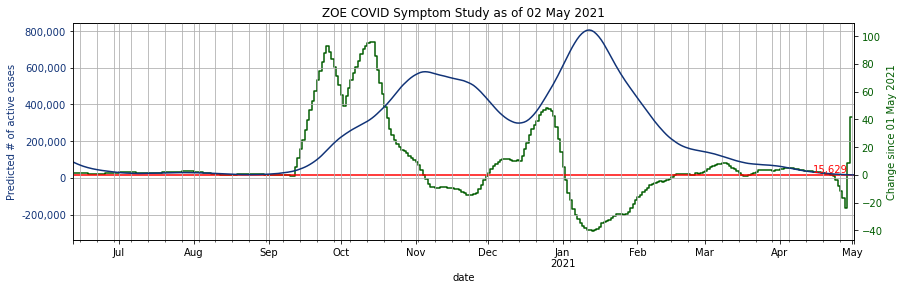

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

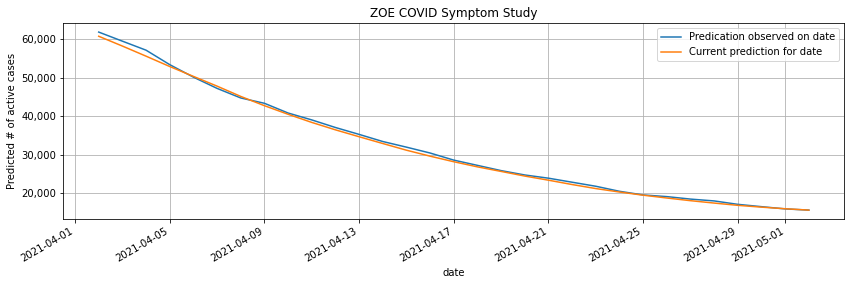

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-05-02_2021-05-02-20-35.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
281,Scottish Borders,S12000026,1.068689
170,Chorley,E07000118,0.398882
325,Wolverhampton,E08000031,0.323140
322,Wrexham,W06000006,0.292573
237,Leeds,E08000035,0.193215
15,"Kingston upon Hull, City of",E06000010,0.141276
340,Brent,E09000005,0.136909
328,Kirklees,E08000034,0.136580
18,North Lincolnshire,E06000013,0.134372
25,Leicester,E06000016,0.119170
